In [1]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter, TensoredMeasFitter, tensored_meas_cal
import numpy as np
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram

C:\Users\ahoyt\AppData\Local\Temp\ipykernel_30988\1523784158.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter, TensoredMeasFitter, tensored_meas_cal


In [2]:
import qiskit
from qiskit import IBMQ
print (qiskit.__version__)
# Load IBM Account
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

0.22.3


In [3]:
from qiskit.providers.aer import AerSimulator
ibm_real = provider.get_backend('ibmq_manila')
ibm_sim = AerSimulator.from_backend(ibm_real)

In [4]:
from qiskit import transpile
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
cregister = ClassicalRegister(5, 'c')
qregister = QuantumRegister(5, 'q')

In [5]:
initial_epr = QuantumCircuit(qregister, cregister)

initial_epr.h(1)
initial_epr.cx(1, 2)
initial_epr.h(3)
initial_epr.cx(3, 4)

In [6]:
bell_state_measurement = QuantumCircuit(qregister, cregister)

bell_state_measurement.cx(2, 3)
bell_state_measurement.h(2)
# bell_state_measurement.barrier((1, 2))
# bell_state_measurement.measure((1 , 2), (1, 2))

#bell_state_measurement.x(4).c_if(3, 1)
#bell_state_measurement.z(4).c_if(2, 1) # Implement if c_if is possible

# bell_state_measurement.cx(2, 3)
# bell_state_measurement.cz(1, 3) # Implement if c_if is not possible
bell_state_measurement.barrier(range(5))

In [7]:
chsh3test = []

In [8]:
rotate_az_cDzx = QuantumCircuit(qregister, cregister)
rotate_az_cDzx.ry(-np.pi/4, 4)
chsh3test.append(rotate_az_cDzx)

rotate_az_cEzx = QuantumCircuit(qregister, cregister)
rotate_az_cEzx.ry(np.pi/4, 4)
chsh3test.append(rotate_az_cEzx)

rotate_ax_cDzx = QuantumCircuit(qregister, cregister)
rotate_ax_cDzx.ry(-np.pi/2, 1)
rotate_ax_cDzx.ry(-np.pi/4, 4)
chsh3test.append(rotate_ax_cDzx)

rotate_ax_cEzx = QuantumCircuit(qregister, cregister)
rotate_ax_cEzx.ry(-np.pi/2, 1)
rotate_ax_cEzx.ry(np.pi/4, 4)
chsh3test.append(rotate_ax_cEzx)

In [9]:
rotate_az_cDzy = QuantumCircuit(qregister, cregister)
rotate_az_cDzy.rx(np.pi/4, 4)
chsh3test.append(rotate_az_cDzy)

rotate_az_cEzy = QuantumCircuit(qregister, cregister)
rotate_az_cEzy.rx(-np.pi/4, 4)
chsh3test.append(rotate_az_cEzy)

rotate_ay_cDzy = QuantumCircuit(qregister, cregister)
rotate_ay_cDzy.rx(np.pi/2, 1)
rotate_ay_cDzy.rx(np.pi/4, 4)
chsh3test.append(rotate_ay_cDzy)

rotate_ay_cEzy = QuantumCircuit(qregister, cregister)
rotate_ay_cEzy.rx(np.pi/2, 1)
rotate_ay_cEzy.rx(-np.pi/4, 4)
chsh3test.append(rotate_ay_cEzy)

In [10]:
rotate_ax_cDxy = QuantumCircuit(qregister, cregister)
rotate_ax_cDxy.ry(-np.pi/2, 1)
rotate_ax_cDxy.rz(-np.pi/4, 4)
rotate_ax_cDxy.ry(-np.pi/2, 4)
chsh3test.append(rotate_ax_cDxy)

rotate_ax_cExy = QuantumCircuit(qregister, cregister)
rotate_ax_cExy.ry(-np.pi/2, 1)
rotate_ax_cExy.rz(np.pi/4, 4)
rotate_ax_cExy.ry(-np.pi/2, 4)
chsh3test.append(rotate_ax_cExy)

rotate_ay_cDxy = QuantumCircuit(qregister, cregister)
rotate_ay_cDxy.rx(np.pi/2, 1)
rotate_ay_cDxy.rz(-np.pi/4, 4)
rotate_ay_cDxy.ry(-np.pi/2, 4)
chsh3test.append(rotate_ay_cDxy)

rotate_ay_cExy = QuantumCircuit(qregister, cregister)
rotate_ay_cExy.rx(np.pi/2, 1)
rotate_ay_cExy.rz(np.pi/4, 4)
rotate_ay_cExy.ry(-np.pi/2, 4)
chsh3test.append(rotate_ay_cExy)

In [11]:
measurement = QuantumCircuit(qregister, cregister)
measurement.barrier(range(5))
measurement.measure((1, 2, 3, 4), (1, 2, 3, 4))

In [12]:
chsh3testlen = len(chsh3test)
circuit_experiments = []
for rotation in chsh3test:
    circuit = QuantumCircuit(qregister, cregister)
    circuit.compose(initial_epr, inplace=True)
    circuit.compose(bell_state_measurement, inplace=True)
    circuit.compose(rotation, inplace=True)
    circuit.compose(measurement, inplace=True)
    circuit_experiments.append(circuit)

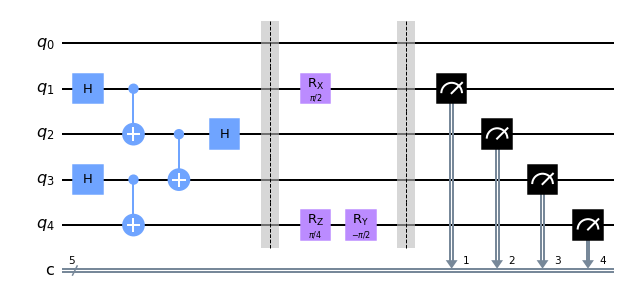

In [13]:
circuit_experiments[-1].draw('mpl')

In [14]:
readoutmitlength = 0
qregistermit = QuantumRegister(5, 'c')
mit_pattern = [[0], [1], [2], [3], [4]]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern = mit_pattern, qr=qregistermit, circlabel='mcal')
readoutmitlength = len(meas_calibs)

# print(meas_calibs)
meas_calibscorr, state_labelscorr = complete_meas_cal(qr=qregistermit, circlabel='ccal')
    
for circ in meas_calibs:
    circuit_experiments.append(circ)
    
for circ in meas_calibscorr:
    circuit_experiments.append(circ)

print(len(meas_calibscorr))
print(len(meas_calibs))

32
2


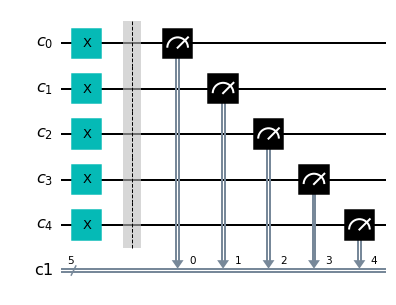

In [15]:
circuit_experiments[-1].draw('mpl')

In [16]:
from qiskit_experiments.library import LocalReadoutError

In [17]:
qubits = [0,1,2,3,4]
num_qubits = len(qubits)
exp = LocalReadoutError(qubits)
exp.analysis.set_options(plot=True)
result = exp.run(ibm_sim)
mitigator = result.analysis_results(0).value

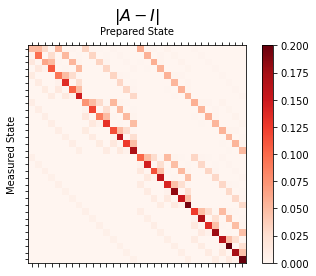

In [18]:
result.figure(0)

In [19]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
ibm_real = provider.get_backend('ibmq_manila')

ibmqfactory.load_account:WARNING:2023-01-11 10:49:58,895: Credentials are already in use. The existing account in the session will be replaced.


In [20]:
transpiled_circuit_exp = transpile(circuit_experiments, ibm_real)
ibm_sim_job = ibm_real.run(transpiled_circuit_exp, shots=20000)

In [21]:
import copy
chsh3testlen = len(chsh3test)
ibm_sim_result = ibm_sim_job.result()
ibm_sim_chsh3 = copy.deepcopy(ibm_sim_result)
ibm_sim_chsh3.results = ibm_sim_chsh3.results[0: chsh3testlen]

ibm_sim_meascalib = copy.deepcopy(ibm_sim_result)
ibm_sim_meascalib.results = ibm_sim_meascalib.results[chsh3testlen: chsh3testlen + readoutmitlength]

ibm_sim_meascalibcorr = copy.deepcopy(ibm_sim_result)
ibm_sim_meascalibcorr.results = ibm_sim_meascalibcorr.results[chsh3testlen + readoutmitlength: -1]

In [22]:
print(readoutmitlength)
# print(ibm_sim_meascalibcorr.get_counts()[31])

2


In [23]:
ibm_sim_meas_fittercorr = CompleteMeasFitter(ibm_sim_meascalibcorr, state_labelscorr, circlabel='ccal')
ibm_sim_meas_filtercorr = ibm_sim_meas_fittercorr.filter
ibm_sim_chsh3_mitigatedcorr = ibm_sim_meas_filtercorr.apply(ibm_sim_chsh3)
array_to_latex(ibm_sim_meas_filtercorr.cal_matrix)

<IPython.core.display.Latex object>

In [24]:
# # Tensored Fitter
# print(np.flip([[0], [1], [2], [3], [4]]))
ibm_sim_meas_fitter = TensoredMeasFitter(ibm_sim_meascalib, mit_pattern=mit_pattern)
ibm_sim_meas_filter = ibm_sim_meas_fitter.filter
ibm_sim_chsh3_mitigated = ibm_sim_meas_filter.apply(ibm_sim_chsh3)
# array_to_latex(ibm_sim_meas_filter.cal_matrix)
print(ibm_sim_meas_fitter.cal_matrices)

[array([[0.9906, 0.0454],
       [0.0094, 0.9546]]), array([[0.9515 , 0.03845],
       [0.0485 , 0.96155]]), array([[0.9789, 0.0431],
       [0.0211, 0.9569]]), array([[0.9879 , 0.04335],
       [0.0121 , 0.95665]]), array([[0.99215, 0.05485],
       [0.00785, 0.94515]])]


In [25]:
print(ibm_sim_chsh3.get_counts()[0])

{'00000': 1842, '10000': 720, '10010': 1880, '10100': 687, '10110': 1778, '11000': 1860, '11010': 696, '11100': 1655, '11110': 662, '00010': 759, '00100': 1770, '00110': 752, '01000': 516, '01010': 1992, '01100': 539, '01110': 1892}


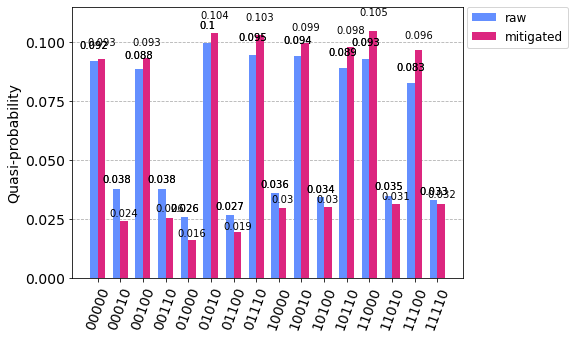

In [26]:
plot_histogram([ibm_sim_chsh3.get_counts()[0], ibm_sim_chsh3_mitigated.get_counts()[0]], legend=['raw', 'mitigated'])

In [27]:
# unmitigated_probs = {label: count for label, count in ibm_sim_chsh3.get_counts()[11].items()}

In [28]:
# mitigated_quasi_probs = mitigator.quasi_probabilities(ibm_sim_chsh3.get_counts()[11])
# mitigated_stddev = mitigated_quasi_probs._stddev_upper_bound
# mitigated_probs = (mitigated_quasi_probs.nearest_probability_distribution().binary_probabilities())
# print(mitigated_probs)

In [29]:
# legend = ['Mitigated Probabilities', 'Unmitigated Probabilities', "Correlated Mit"]
# plot_histogram([mitigated_probs, unmitigated_probs, ibm_sim_chsh3_mitigated.get_counts()[11]], legend=legend, sort="value_desc", bar_labels=False)

In [30]:
def calc_chsh1(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[3]
    xx = theta_dict[2]
    
    no_shots = sum(xx[y] for y in xx)

    chsh = 0
    totalOO = 0

    for element in zz:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += zz[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*zz[element]
        
    for element in zx:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += zx[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*zx[element]

    for element in xz:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += xz[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh -= parity*xz[element]

    for element in xx:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += xx[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*xx[element]
    
    return 4*chsh / totalOO

In [31]:
def calc_chsh23(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[2]
    xx = theta_dict[3]
    
    no_shots = sum(xx[y] for y in xx)

    chsh = 0
    totalOO = 0

    for element in zz:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += zz[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*zz[element]

    for element in zx:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += zx[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*zx[element]

    for element in xz:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += xz[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh -= parity*xz[element]

    for element in xx:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += xx[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*xx[element]
    
    return 4*chsh / totalOO

In [32]:
def calc_chsh23std(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[2]
    xx = theta_dict[3]
    
    no_shots = sum(xx[y] for y in xx)

    chsh = 0
    totalOO = 0
    zznumneg = 0
    zznumpos = 0
    zztot = 0
    zxnumneg = 0
    zxnumpos = 0
    zxtot = 0
    xznumneg = 0
    xznumpos = 0
    xztot = 0
    xxnumneg = 0
    xxnumpos = 0
    xxtot = 0

    for element in zz:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += zz[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*zz[element]
            zznumneg += zz[element] if parity == -1 else 0
            zznumpos += zz[element] if parity == 1 else 0
            zztot += zz[element]

    for element in zx:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += zx[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*zx[element]
            zxnumneg += zx[element] if parity == -1 else 0
            zxnumpos += zx[element] if parity == 1 else 0
            zxtot += zx[element]

    for element in xz:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += xz[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh -= parity*xz[element]
            xznumneg += xz[element] if parity == -1 else 0
            xznumpos += xz[element] if parity == 1 else 0
            xztot += xz[element]

    for element in xx:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += xx[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*xx[element]
            xxnumneg += xx[element] if parity == -1 else 0
            xxnumpos += xx[element] if parity == 1 else 0
            xxtot += xx[element]
            
    zzdata = np.concatenate((np.ones(int(zznumpos)), -np.ones(int(zznumneg))))
    zzdatastd = np.std(zzdata) / np.sqrt(len(zzdata))
    zxdata = np.concatenate((np.ones(int(zxnumpos)), -np.ones(int(zxnumneg))))
    zxdatastd = np.std(zxdata) / np.sqrt(len(zzdata))
    xzdata = -np.concatenate((np.ones(int(xznumpos)), -np.ones(int(xznumneg))))
    xzdatastd = np.std(xzdata) / np.sqrt(len(zzdata))
    xxdata = np.concatenate((np.ones(int(xxnumpos)), -np.ones(int(xxnumneg))))
    xxdatastd = np.std(xzdata) / np.sqrt(len(zzdata))
    
    
    chshdata = np.concatenate((zzdata, zxdata, xzdata, xxdata))
    
    return np.sqrt(zzdatastd**2 + zxdatastd**2 + xzdatastd**2 + xxdatastd**2)

In [33]:
def calc_chsh1std(theta_dict):
    zz = theta_dict[0]
    zx = theta_dict[1]
    xz = theta_dict[3]
    xx = theta_dict[2]
    
    no_shots = sum(xx[y] for y in xx)

    chsh = 0
    totalOO = 0
    zznumneg = 0
    zznumpos = 0
    zztot = 0
    zxnumneg = 0
    zxnumpos = 0
    zxtot = 0
    xznumneg = 0
    xznumpos = 0
    xztot = 0
    xxnumneg = 0
    xxnumpos = 0
    xxtot = 0

    for element in zz:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += zz[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*zz[element]
            zznumneg += zz[element] if parity == -1 else 0
            zznumpos += zz[element] if parity == 1 else 0
            zztot += zz[element]

    for element in zx:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += zx[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*zx[element]
            zxnumneg += zx[element] if parity == -1 else 0
            zxnumpos += zx[element] if parity == 1 else 0
            zxtot += zx[element]

    for element in xz:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += xz[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh -= parity*xz[element]
            xznumneg += xz[element] if parity == -1 else 0
            xznumpos += xz[element] if parity == 1 else 0
            xztot += xz[element]

    for element in xx:
        if (int(element[1]) == 0 and int(element[2]) == 0):
            totalOO += xx[element]
            parity = (-1)**(int(element[0])+int(element[3]))
            chsh += parity*xx[element]
            xxnumneg += xx[element] if parity == -1 else 0
            xxnumpos += xx[element] if parity == 1 else 0
            xxtot += xx[element]
            
    zzdata = np.concatenate((np.ones(int(zznumpos)), -np.ones(int(zznumneg))))
    zzdatastd = np.std(zzdata) / np.sqrt(len(zzdata))
    zxdata = np.concatenate((np.ones(int(zxnumpos)), -np.ones(int(zxnumneg))))
    zxdatastd = np.std(zxdata) / np.sqrt(len(zzdata))
    xzdata = -np.concatenate((np.ones(int(xznumpos)), -np.ones(int(xznumneg))))
    xzdatastd = np.std(xzdata) / np.sqrt(len(zzdata))
    xxdata = np.concatenate((np.ones(int(xxnumpos)), -np.ones(int(xxnumneg))))
    xxdatastd = np.std(xzdata) / np.sqrt(len(zzdata))
    
    
    chshdata = np.concatenate((zzdata, zxdata, xzdata, xxdata))
    
    return np.sqrt(zzdatastd**2 + zxdatastd**2 + xzdatastd**2 + xxdatastd**2)

In [34]:
def get_chsh3(circuit_counts):
    chsh23 = calc_chsh23(circuit_counts[8:12]) + calc_chsh23(circuit_counts[4:8])
    chsh1 = calc_chsh1(circuit_counts[0:4])
    return chsh23 + chsh1

In [35]:
def geterror(circuit_counts):
    chsh1 = calc_chsh23std(circuit_counts[8:12])
    chsh2 = calc_chsh23std(circuit_counts[4:8])
    chsh3 = calc_chsh1std(circuit_counts[0:4])
    totalstd = np.sqrt(chsh1**2 + chsh2**2 + chsh3**2)
    return totalstd

In [36]:
print(geterror(ibm_sim_chsh3_mitigated.get_counts()))
print(get_chsh3(ibm_sim_chsh3_mitigated.get_counts()))
print(get_chsh3(ibm_sim_chsh3_mitigatedcorr.get_counts()))
print(get_chsh3(ibm_sim_chsh3.get_counts()))

0.03866415443449063
7.833083048609859
8.06179471997484
5.9073064853036925


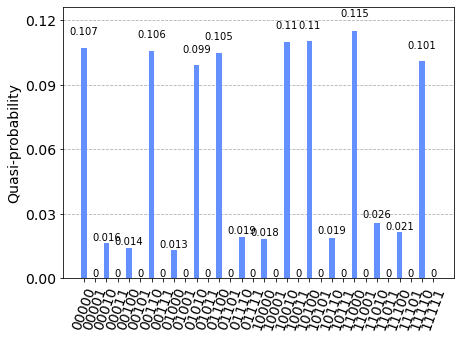

In [37]:
plot_histogram(ibm_sim_chsh3_mitigated.get_counts()[-1])